# Plot model fit comparisons for simulation analysis 1

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mindstorm import statplot
from cfr import framework
from cfr import figures

fit_dir = Path(os.environ['CFR_FITS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim1'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

## Load model fits

In [2]:
components = [
    'loc', 'cat', 'use', 'loc-cat', 'loc-use', 'cat-use', 'loc-cat-use'
]
models = [f'cmrs_fcf-{comp}' for comp in components]
model_names = ['I', 'C', 'D', 'IC', 'ID', 'CD', 'ICD']
res = framework.read_model_xvals(fit_dir, models, model_names)

In [3]:
res.groupby('model')['logl_test_list'].mean().sort_values()

model
D     -34.585169
C     -33.317897
CD    -33.149982
I     -32.431015
ID    -31.356594
IC    -30.887776
ICD   -30.759891
Name: logl_test_list, dtype: float64

LINO NOT subset; don't know how to subset; dropped


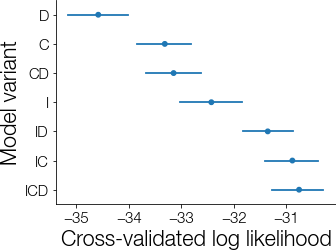

In [4]:
# plot cross-validation log-likelihood with within-subject error
res['deviation'] = figures.remove_subject_variance(
    res, 'logl_test_list', 'subject'
)
res['mean_deviation'] = res.groupby('model')['deviation'].transform('mean')
res_sorted = res.sort_values('mean_deviation').reset_index()
g = sns.catplot(
    data=res_sorted, 
    x='deviation', 
    y='model', 
    kind='point', 
    join=False, 
    aspect=1.3, 
    height=4,
)
g.set(xlabel='Cross-validated log likelihood', ylabel='Model variant')
g.savefig(fig_dir / 'model_comp_xval.pdf');

In [5]:
dark = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=1, hue=.5'
)
dark

[(0.7689335648950519, 0.6824396172757954, 0.6240123846554909),
 (0.7250187127782463, 0.5677430873950093, 0.6103083104698684),
 (0.623013021104788, 0.4855809829815538, 0.6161810850461853),
 (0.464634733019296, 0.4332443294049108, 0.5801730795425324),
 (0.31355069957273196, 0.3965359745123169, 0.4760973803152319),
 (0.2050147315167219, 0.34168808481661433, 0.31762490490999895)]

In [6]:
light = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=.5, hue=1'
)
light

[(0.9248203983802259, 0.8124754066629261, 0.7365856230946308),
 (0.9370151046580671, 0.7134152392755648, 0.773930517001042),
 (0.8638347057562072, 0.6485629096614572, 0.8531332480304541),
 (0.6875944308206159, 0.6323388125763083, 0.8909732355818533),
 (0.4826946089121227, 0.6491392670198295, 0.8087166257388984),
 (0.325484389760949, 0.649366831333291, 0.5923429764853889)]

## Context component weights

In [7]:
param = res.loc['ICD', ['w_loc', 'w_cat', 'w_use']]
df = pd.melt(
    param.reset_index(),
    id_vars='subject',
    value_name='Weight',
    var_name='Component',
)

LINO NOT subset; don't know how to subset; dropped


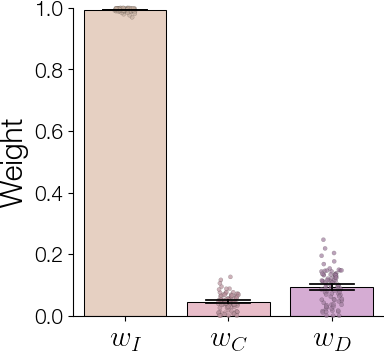

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
g = statplot.plot_swarm_bar(
    data=df.reset_index(),
    x='Component',
    y='Weight',
    point_kind='strip',
    point_kws={'clip_on': False},
    dark=dark,
    light=light,
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Weight');
ax.set_xticks([0, 1, 2], ['$w_I$', '$w_C$', '$w_D$'], usetex=True)
fig.savefig(fig_dir / 'weights.pdf')

## Create a parameter table

In [14]:
table = figures.create_model_table(fit_dir, models, model_names, model_comp='xval')
table.to_latex(fig_dir / 'parameters1.tex', escape=False)
table

/var/folders/9d/zh72ny012k7bvgr427k05d8w0000gn/T/ipykernel_41112/2496314056.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex(fig_dir / 'parameters1.tex', escape=False)


,I,C,D,IC,ID,CD,ICD
$L_{FC}$,0.13 (0.01),0.75 (0.00),0.61 (0.02),0.10 (0.01),0.11 (0.01),0.73 (0.01),0.10 (0.01)
$L_{CF}$,0.11 (0.01),0.80 (0.01),0.69 (0.01),0.09 (0.01),0.10 (0.01),0.74 (0.01),0.09 (0.01)
$\phi_s$,0.39 (0.06),0.08 (0.00),0.22 (0.02),0.04 (0.00),0.08 (0.01),0.05 (0.00),0.03 (0.00)
$\phi_d$,1.24 (0.13),0.52 (0.07),0.35 (0.02),1.81 (0.19),1.80 (0.18),0.46 (0.07),1.84 (0.18)
$\beta_{\mathrm{enc}}$,0.71 (0.01),0.04 (0.00),0.10 (0.01),0.64 (0.01),0.66 (0.01),0.05 (0.01),0.62 (0.01)
$\beta_{\mathrm{start}}$,0.62 (0.04),0.00 (0.00),0.03 (0.01),0.51 (0.04),0.61 (0.04),0.01 (0.01),0.50 (0.04)
$\beta_{\mathrm{rec}}$,0.78 (0.01),0.95 (0.01),0.88 (0.03),0.86 (0.01),0.84 (0.01),0.94 (0.02),0.86 (0.01)
$\theta_s$,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)
$\theta_r$,0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01)
$w_1$,---,---,---,0.94 (0.00),0.83 (0.00),0.44 (0.02),0.96 (0.00)


In [10]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

numpy     : 1.21.4
matplotlib: 3.5.2
mindstorm : 0.8.1
pandas    : 1.4.2
seaborn   : 0.11.2
cfr       : 0.1.0

